In [8]:
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline  

import tensorflow as tf
import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler

In [3]:
# Load the data 'https://www.cs.toronto.edu/~kriz/cifar.html'
# although the dataset has 10 classes, will focus only on 2: horse and deer
batch_size = 64
num_classes = 2
epochs = 100

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Only look at deer [=4] and horse [=7]
train_picks = np.ravel(np.logical_or(y_train==4,y_train==7))  
test_picks = np.ravel(np.logical_or(y_test==4,y_test==7))     

y_train = np.array(y_train[train_picks]==7,dtype=int)
y_test = np.array(y_test[test_picks]==7,dtype=int)

X_train = X_train[train_picks]
X_test = X_test[test_picks]



if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)


X_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


In [9]:
# Define a Model 


model_1 = tf.keras.models.Sequential([
    Conv2D(4,(3, 3),activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)), # Reduce by taking the max of each 2x2 block
    Dropout(0.25), # Dropout to avoid overfitting
    Flatten(), # Flatten the results to one dimension for passing into our final layer
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax') # Final categorization from 0-9 with softmax
])        



In [28]:
model_1

In [11]:
# define SGD optimizer
lr = 0.1
sgd = SGD(learning_rate=lr, momentum=0.0, decay=0.0, nesterov=False) # set to default except learning rate which is set to 0.1

# compile the model
model_1.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history_1 = model_1.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=2,
                validation_data=(X_test, y_test))



Epoch 1/100


C:\Users\raque\.conda\envs\Udemy\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


157/157 - 15s - loss: 0.6627 - accuracy: 0.6037 - val_loss: 0.6017 - val_accuracy: 0.7240 - 15s/epoch - 93ms/step
Epoch 2/100
157/157 - 13s - loss: 0.6054 - accuracy: 0.6849 - val_loss: 0.6788 - val_accuracy: 0.5760 - 13s/epoch - 85ms/step
Epoch 3/100
157/157 - 13s - loss: 0.5740 - accuracy: 0.7143 - val_loss: 0.6583 - val_accuracy: 0.5920 - 13s/epoch - 85ms/step
Epoch 4/100
157/157 - 14s - loss: 0.5316 - accuracy: 0.7376 - val_loss: 0.4754 - val_accuracy: 0.7900 - 14s/epoch - 90ms/step
Epoch 5/100
157/157 - 13s - loss: 0.5089 - accuracy: 0.7520 - val_loss: 0.4662 - val_accuracy: 0.7845 - 13s/epoch - 85ms/step
Epoch 6/100
157/157 - 13s - loss: 0.4940 - accuracy: 0.7617 - val_loss: 0.5087 - val_accuracy: 0.7440 - 13s/epoch - 85ms/step
Epoch 7/100
157/157 - 14s - loss: 0.4773 - accuracy: 0.7723 - val_loss: 0.4376 - val_accuracy: 0.7985 - 14s/epoch - 86ms/step
Epoch 8/100
157/157 - 13s - loss: 0.4682 - accuracy: 0.7752 - val_loss: 0.4827 - val_accuracy: 0.7745 - 13s/epoch - 85ms/step
Epoc

Epoch 66/100
157/157 - 13s - loss: 0.2815 - accuracy: 0.8721 - val_loss: 0.3757 - val_accuracy: 0.8480 - 13s/epoch - 84ms/step
Epoch 67/100
157/157 - 14s - loss: 0.2809 - accuracy: 0.8725 - val_loss: 0.3580 - val_accuracy: 0.8455 - 14s/epoch - 86ms/step
Epoch 68/100
157/157 - 14s - loss: 0.2819 - accuracy: 0.8706 - val_loss: 0.3845 - val_accuracy: 0.8470 - 14s/epoch - 89ms/step
Epoch 69/100
157/157 - 14s - loss: 0.2765 - accuracy: 0.8751 - val_loss: 0.4497 - val_accuracy: 0.8215 - 14s/epoch - 88ms/step
Epoch 70/100
157/157 - 14s - loss: 0.2810 - accuracy: 0.8670 - val_loss: 0.3646 - val_accuracy: 0.8495 - 14s/epoch - 87ms/step
Epoch 71/100
157/157 - 14s - loss: 0.2758 - accuracy: 0.8688 - val_loss: 0.3776 - val_accuracy: 0.8430 - 14s/epoch - 87ms/step
Epoch 72/100
157/157 - 14s - loss: 0.2837 - accuracy: 0.8734 - val_loss: 0.3850 - val_accuracy: 0.8470 - 14s/epoch - 88ms/step
Epoch 73/100
157/157 - 13s - loss: 0.2762 - accuracy: 0.8738 - val_loss: 0.3665 - val_accuracy: 0.8485 - 13s/ep

NameError: name 'pd' is not defined

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 4)         112       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         296       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 16)                25104     
                                                        

<Axes: >

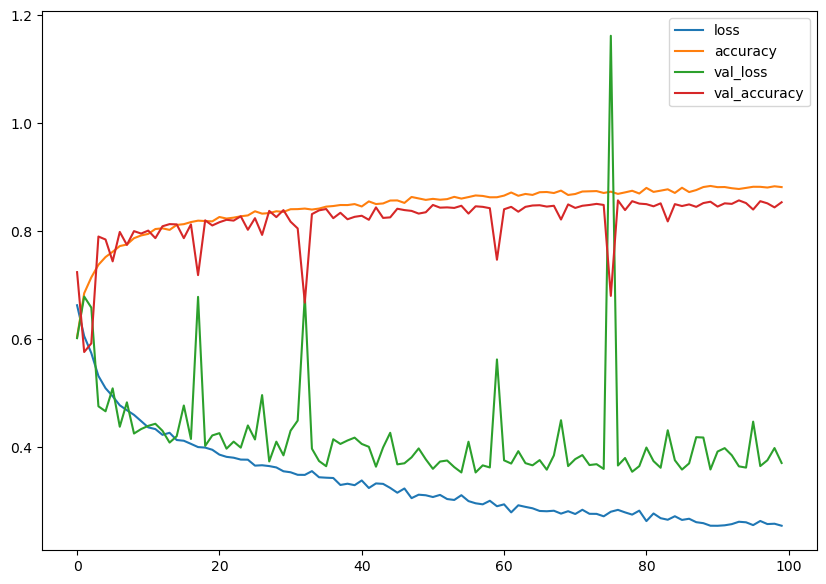

In [15]:
import pandas as pd
# plot model accuracy/loss
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [ ]:
# This will serve as baseline to evaluate the other learning rate strategies

Epoch 1/100
157/157 - 14s - loss: 0.2545 - accuracy: 0.8774 - val_loss: 0.3845 - val_accuracy: 0.8490 - 14s/epoch - 91ms/step
Epoch 2/100
157/157 - 14s - loss: 0.2417 - accuracy: 0.8862 - val_loss: 0.4174 - val_accuracy: 0.8565 - 14s/epoch - 87ms/step
Epoch 3/100
157/157 - 13s - loss: 0.2425 - accuracy: 0.8881 - val_loss: 0.3824 - val_accuracy: 0.8525 - 13s/epoch - 86ms/step
Epoch 4/100
157/157 - 14s - loss: 0.2461 - accuracy: 0.8843 - val_loss: 0.3882 - val_accuracy: 0.8600 - 14s/epoch - 88ms/step
Epoch 5/100
157/157 - 14s - loss: 0.2321 - accuracy: 0.8907 - val_loss: 0.3977 - val_accuracy: 0.8495 - 14s/epoch - 87ms/step
Epoch 6/100
157/157 - 13s - loss: 0.2365 - accuracy: 0.8890 - val_loss: 0.4419 - val_accuracy: 0.8300 - 13s/epoch - 86ms/step
Epoch 7/100
157/157 - 14s - loss: 0.2350 - accuracy: 0.8894 - val_loss: 0.4209 - val_accuracy: 0.8445 - 14s/epoch - 89ms/step
Epoch 8/100
157/157 - 14s - loss: 0.2280 - accuracy: 0.8946 - val_loss: 0.3875 - val_accuracy: 0.8540 - 14s/epoch - 86

Epoch 66/100
157/157 - 13s - loss: 0.1947 - accuracy: 0.9078 - val_loss: 0.3947 - val_accuracy: 0.8600 - 13s/epoch - 84ms/step
Epoch 67/100
157/157 - 13s - loss: 0.1936 - accuracy: 0.9036 - val_loss: 0.4041 - val_accuracy: 0.8630 - 13s/epoch - 86ms/step
Epoch 68/100
157/157 - 13s - loss: 0.1997 - accuracy: 0.9040 - val_loss: 0.4046 - val_accuracy: 0.8605 - 13s/epoch - 84ms/step
Epoch 69/100
157/157 - 13s - loss: 0.1991 - accuracy: 0.9071 - val_loss: 0.4015 - val_accuracy: 0.8630 - 13s/epoch - 83ms/step
Epoch 70/100
157/157 - 14s - loss: 0.1960 - accuracy: 0.9070 - val_loss: 0.3970 - val_accuracy: 0.8610 - 14s/epoch - 90ms/step
Epoch 71/100
157/157 - 14s - loss: 0.1940 - accuracy: 0.9059 - val_loss: 0.4015 - val_accuracy: 0.8645 - 14s/epoch - 86ms/step
Epoch 72/100
157/157 - 14s - loss: 0.2049 - accuracy: 0.9024 - val_loss: 0.3977 - val_accuracy: 0.8625 - 14s/epoch - 87ms/step
Epoch 73/100
157/157 - 14s - loss: 0.1933 - accuracy: 0.9087 - val_loss: 0.4018 - val_accuracy: 0.8660 - 14s/ep

<Axes: >

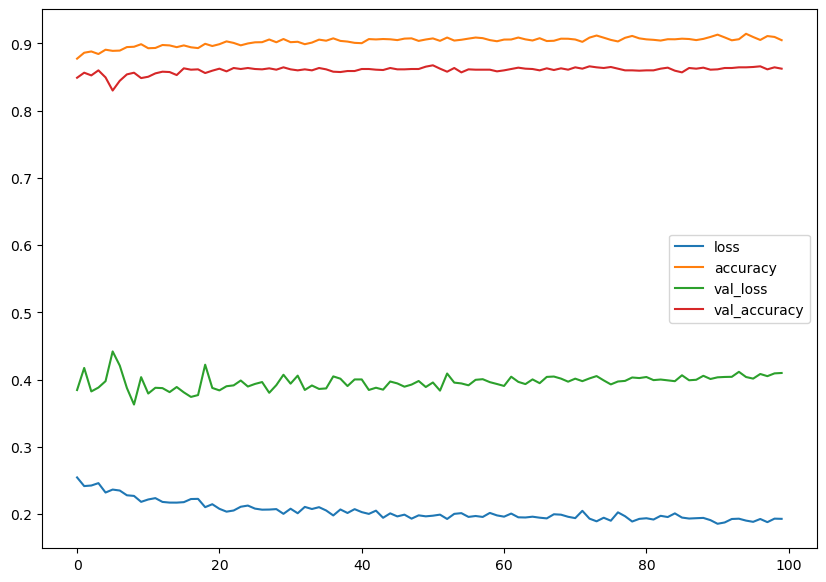

In [17]:
# Learning-rate: time-based decay


# define SGD optimizer
lr= 0.1
decay_rate = learning_rate / epochs
momentum = 0.5 # usually between 0.5 to 0.9
sgd = SGD(learning_rate=lr, momentum=momentum, decay=decay_rate, nesterov=False) 

#  Nesterov momentum is a different version of the momentum method,
# which has stronger theoretical converge guarantees for convex functions

model_2 = model_1
# compile the model
model_2.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history_2 = model_2.fit(X_train, y_train, 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2, 
                     validation_data=(X_test, y_test))


# plot model accuracy/loss
pd.DataFrame(history_2.history).plot(figsize=(10,7))

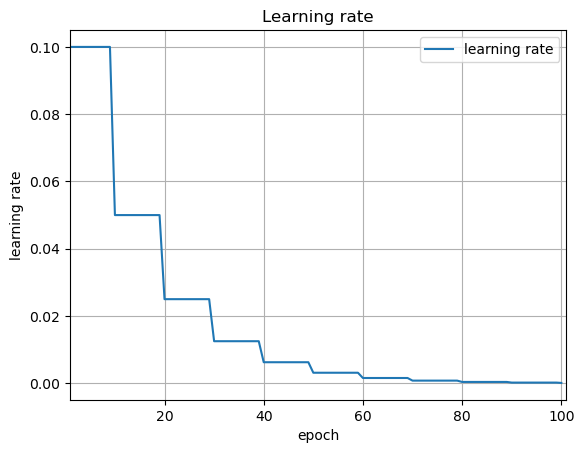

In [19]:
# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()
fig.savefig('model_2-learning-rate.jpg')
plt.close(fig)

In [13]:
# Step-decay
# Step decay schedule drops the learning rate by a factor every few epochs.


model_3 = model_1


# define SGD optimizer
momentum = 0.5
sgd = SGD(learning_rate=0.0, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model_3.compile(loss=keras.losses.categorical_crossentropy,optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch): #drop the learning rate by 1/2 every 10 epocs
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]

# fit the model
history_3 = model_3.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size, 
                     callbacks=callbacks_list, 
                     verbose=2)


# plot model accuracy/loss
pd.DataFrame(history_3.history).plot(figsize=(10,7))

Epoch 1/100
lr: 0.1
157/157 - 15s - loss: 0.2847 - accuracy: 0.8662 - val_loss: 0.3616 - val_accuracy: 0.8420 - lr: 0.1000 - 15s/epoch - 93ms/step
Epoch 2/100
lr: 0.1
157/157 - 14s - loss: 0.3032 - accuracy: 0.8564 - val_loss: 0.3737 - val_accuracy: 0.8395 - lr: 0.1000 - 14s/epoch - 88ms/step
Epoch 3/100
lr: 0.1
157/157 - 14s - loss: 0.2749 - accuracy: 0.8745 - val_loss: 0.4207 - val_accuracy: 0.8290 - lr: 0.1000 - 14s/epoch - 87ms/step
Epoch 4/100
lr: 0.1
157/157 - 13s - loss: 0.2800 - accuracy: 0.8691 - val_loss: 0.3717 - val_accuracy: 0.8470 - lr: 0.1000 - 13s/epoch - 84ms/step
Epoch 5/100
lr: 0.1
157/157 - 13s - loss: 0.2853 - accuracy: 0.8686 - val_loss: 0.4441 - val_accuracy: 0.8250 - lr: 0.1000 - 13s/epoch - 85ms/step
Epoch 6/100
lr: 0.1
157/157 - 13s - loss: 0.2677 - accuracy: 0.8767 - val_loss: 0.3749 - val_accuracy: 0.8525 - lr: 0.1000 - 13s/epoch - 83ms/step
Epoch 7/100
lr: 0.1
157/157 - 13s - loss: 0.2798 - accuracy: 0.8696 - val_loss: 0.3595 - val_accuracy: 0.8545 - lr: 0.

Epoch 56/100
lr: 0.003125
157/157 - 14s - loss: 0.2066 - accuracy: 0.9030 - val_loss: 0.3912 - val_accuracy: 0.8560 - lr: 0.0031 - 14s/epoch - 87ms/step
Epoch 57/100
lr: 0.003125
157/157 - 14s - loss: 0.2099 - accuracy: 0.8988 - val_loss: 0.3923 - val_accuracy: 0.8570 - lr: 0.0031 - 14s/epoch - 89ms/step
Epoch 58/100
lr: 0.003125
157/157 - 14s - loss: 0.2028 - accuracy: 0.9034 - val_loss: 0.3869 - val_accuracy: 0.8555 - lr: 0.0031 - 14s/epoch - 88ms/step
Epoch 59/100
lr: 0.003125
157/157 - 13s - loss: 0.2070 - accuracy: 0.8982 - val_loss: 0.3875 - val_accuracy: 0.8565 - lr: 0.0031 - 13s/epoch - 86ms/step
Epoch 60/100
lr: 0.0015625
157/157 - 14s - loss: 0.2064 - accuracy: 0.9003 - val_loss: 0.3890 - val_accuracy: 0.8590 - lr: 0.0031 - 14s/epoch - 86ms/step
Epoch 61/100
lr: 0.0015625
157/157 - 14s - loss: 0.1975 - accuracy: 0.9045 - val_loss: 0.3952 - val_accuracy: 0.8560 - lr: 0.0016 - 14s/epoch - 87ms/step
Epoch 62/100
lr: 0.0015625
157/157 - 13s - loss: 0.2040 - accuracy: 0.9021 - val

NameError: name 'pd' is not defined

<Axes: >

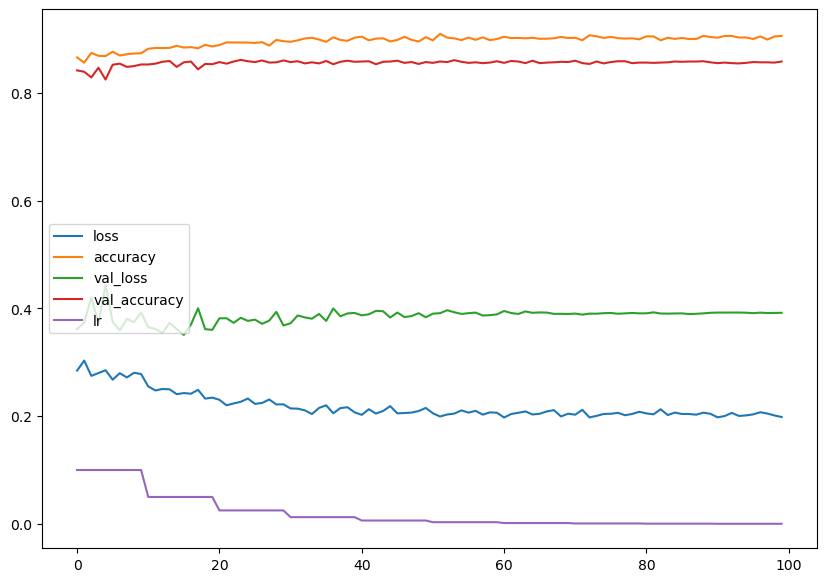

In [16]:

# plot model accuracy/loss
pd.DataFrame(history_3.history).plot(figsize=(10,7))

Epoch 1/100
lr: 0.09048374180359596
157/157 - 15s - loss: 0.3808 - accuracy: 0.8285 - val_loss: 0.4174 - val_accuracy: 0.8180 - lr: 0.1000 - 15s/epoch - 96ms/step
Epoch 2/100
lr: 0.0818730753077982
157/157 - 14s - loss: 0.3584 - accuracy: 0.8389 - val_loss: 0.4134 - val_accuracy: 0.8220 - lr: 0.0905 - 14s/epoch - 90ms/step
Epoch 3/100
lr: 0.0740818220681718
157/157 - 14s - loss: 0.3436 - accuracy: 0.8398 - val_loss: 0.4289 - val_accuracy: 0.8230 - lr: 0.0819 - 14s/epoch - 88ms/step
Epoch 4/100
lr: 0.06703200460356394
157/157 - 14s - loss: 0.3597 - accuracy: 0.8276 - val_loss: 0.4070 - val_accuracy: 0.8255 - lr: 0.0741 - 14s/epoch - 89ms/step
Epoch 5/100
lr: 0.06065306597126335
157/157 - 14s - loss: 0.3347 - accuracy: 0.8398 - val_loss: 0.4293 - val_accuracy: 0.8265 - lr: 0.0670 - 14s/epoch - 87ms/step
Epoch 6/100
lr: 0.05488116360940264
157/157 - 14s - loss: 0.3234 - accuracy: 0.8504 - val_loss: 0.4308 - val_accuracy: 0.8340 - lr: 0.0607 - 14s/epoch - 89ms/step
Epoch 7/100
lr: 0.049658

Epoch 51/100
lr: 0.0006096746565515633
157/157 - 13s - loss: 0.2249 - accuracy: 0.8926 - val_loss: 0.3873 - val_accuracy: 0.8595 - lr: 6.7379e-04 - 13s/epoch - 86ms/step
Epoch 52/100
lr: 0.0005516564420760772
157/157 - 13s - loss: 0.2249 - accuracy: 0.8914 - val_loss: 0.3888 - val_accuracy: 0.8600 - lr: 6.0967e-04 - 13s/epoch - 84ms/step
Epoch 53/100
lr: 0.0004991593906910213
157/157 - 13s - loss: 0.2282 - accuracy: 0.8923 - val_loss: 0.3870 - val_accuracy: 0.8590 - lr: 5.5166e-04 - 13s/epoch - 85ms/step
Epoch 54/100
lr: 0.0004516580942612666
157/157 - 14s - loss: 0.2306 - accuracy: 0.8871 - val_loss: 0.3884 - val_accuracy: 0.8600 - lr: 4.9916e-04 - 14s/epoch - 86ms/step
Epoch 55/100
lr: 0.00040867714384640666
157/157 - 14s - loss: 0.2305 - accuracy: 0.8931 - val_loss: 0.3885 - val_accuracy: 0.8615 - lr: 4.5166e-04 - 14s/epoch - 87ms/step
Epoch 56/100
lr: 0.0003697863716482929
157/157 - 14s - loss: 0.2382 - accuracy: 0.8867 - val_loss: 0.3882 - val_accuracy: 0.8605 - lr: 4.0868e-04 - 1

Epoch 100/100
lr: 4.539992976248485e-06
157/157 - 14s - loss: 0.2314 - accuracy: 0.8907 - val_loss: 0.3852 - val_accuracy: 0.8580 - lr: 5.0175e-06 - 14s/epoch - 87ms/step


<Axes: >

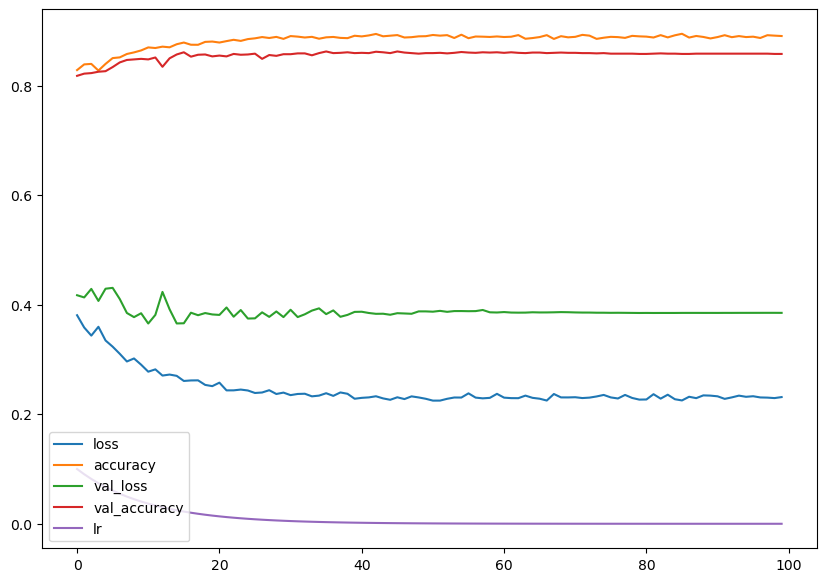

In [20]:
# Learning rate: exponential decay


model_4 = model_1

# define SGD optimizer
momentum = 0.8
sgd = SGD(learning_rate = 0.0, momentum=momentum, decay=0.0, nesterov=False)

# compile the model
model_4.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory_(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(len(self.losses)))
        print('lr:', exp_decay(len(self.losses)))

def exp_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate

# learning schedule callback
loss_history_ = LossHistory_()
lrate_ = LearningRateScheduler(exp_decay)
callbacks_list_ = [loss_history_, lrate_]

# fit the model
history_4 = model_4.fit(X_train, y_train, 
     validation_data=(X_test, y_test), 
     epochs=epochs, 
     batch_size=batch_size, 
     callbacks=callbacks_list_, 
     verbose=2)

# plot model accuracy/loss
pd.DataFrame(history_4.history).plot(figsize=(10,7))

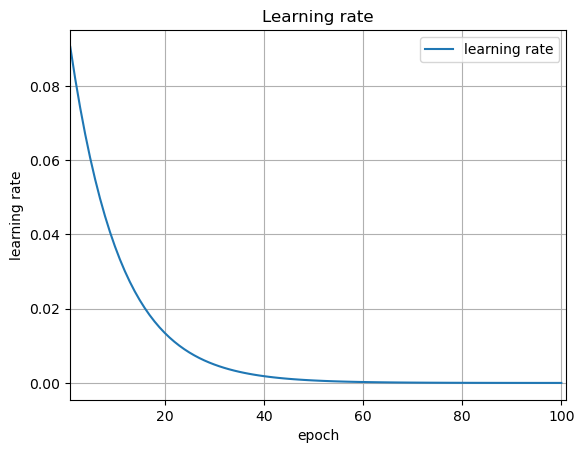

In [21]:
# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history_.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()
fig.savefig('model_4-learning-rate.jpg')
plt.close(fig)

In [22]:
#Adaptive gradient descent algorithms : Adagrad, Adadelta, RMSprop, Adam
# per-parameter learning rate methods

# fit CNN model using Adagrad optimizer
# Adagrad performs larger updates for more sparse parameters and smaller updates for less sparse parameter. 
# It has good performance with sparse data and training large-scale neural network. 
# Monotonic Learning Rate
model_5 = model_1
model_5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adagrad(learning_rate=0.01, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history_5 = model_5.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)


# fit CNN model using Adadelta optimizer
# Adadelta is an extension of Adagrad that aims to reduce its aggressive, monotonically decreasing learning rate.
model_6 =  model_1
model_6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adadelta(learning_rate=1.0, rho=0.95, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history_6 = model_6.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)




# fit CNN model using RMSprop optimizer
# djusts the Adagrad method in an attempt to reduce its aggressive, monotonically decreasing learning rate. 
model_7 =  model_1
model_7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history_7 = model_7.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)




# fit CNN model using Adam optimizer
# update to the RMSProp optimizer, and it has momentum
model_8 =  model_1
model_8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history_8 = model_8.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

Epoch 1/100
157/157 - 15s - loss: 0.2343 - accuracy: 0.8900 - val_loss: 0.3883 - val_accuracy: 0.8580 - 15s/epoch - 93ms/step
Epoch 2/100
157/157 - 14s - loss: 0.2282 - accuracy: 0.8935 - val_loss: 0.3889 - val_accuracy: 0.8620 - 14s/epoch - 90ms/step
Epoch 3/100
157/157 - 13s - loss: 0.2319 - accuracy: 0.8926 - val_loss: 0.3856 - val_accuracy: 0.8580 - 13s/epoch - 85ms/step
Epoch 4/100
157/157 - 13s - loss: 0.2323 - accuracy: 0.8888 - val_loss: 0.3867 - val_accuracy: 0.8610 - 13s/epoch - 85ms/step
Epoch 5/100
157/157 - 14s - loss: 0.2289 - accuracy: 0.8878 - val_loss: 0.3885 - val_accuracy: 0.8625 - 14s/epoch - 87ms/step
Epoch 6/100
157/157 - 14s - loss: 0.2271 - accuracy: 0.8901 - val_loss: 0.3900 - val_accuracy: 0.8595 - 14s/epoch - 87ms/step
Epoch 7/100
157/157 - 14s - loss: 0.2299 - accuracy: 0.8930 - val_loss: 0.3913 - val_accuracy: 0.8625 - 14s/epoch - 87ms/step
Epoch 8/100
157/157 - 13s - loss: 0.2273 - accuracy: 0.8936 - val_loss: 0.3864 - val_accuracy: 0.8625 - 13s/epoch - 86

Epoch 66/100
157/157 - 14s - loss: 0.2123 - accuracy: 0.8965 - val_loss: 0.3941 - val_accuracy: 0.8605 - 14s/epoch - 87ms/step
Epoch 67/100
157/157 - 14s - loss: 0.2258 - accuracy: 0.8893 - val_loss: 0.3904 - val_accuracy: 0.8620 - 14s/epoch - 91ms/step
Epoch 68/100
157/157 - 14s - loss: 0.2177 - accuracy: 0.8951 - val_loss: 0.3899 - val_accuracy: 0.8610 - 14s/epoch - 88ms/step
Epoch 69/100
157/157 - 14s - loss: 0.2155 - accuracy: 0.8956 - val_loss: 0.3927 - val_accuracy: 0.8580 - 14s/epoch - 86ms/step
Epoch 70/100
157/157 - 14s - loss: 0.2177 - accuracy: 0.8949 - val_loss: 0.3911 - val_accuracy: 0.8615 - 14s/epoch - 87ms/step
Epoch 71/100
157/157 - 14s - loss: 0.2174 - accuracy: 0.8991 - val_loss: 0.3935 - val_accuracy: 0.8625 - 14s/epoch - 88ms/step
Epoch 72/100
157/157 - 16s - loss: 0.2266 - accuracy: 0.8922 - val_loss: 0.3921 - val_accuracy: 0.8590 - 16s/epoch - 101ms/step
Epoch 73/100
157/157 - 16s - loss: 0.2124 - accuracy: 0.8968 - val_loss: 0.3919 - val_accuracy: 0.8610 - 16s/e

Epoch 31/100
157/157 - 13s - loss: 0.2039 - accuracy: 0.9045 - val_loss: 0.3959 - val_accuracy: 0.8670 - 13s/epoch - 85ms/step
Epoch 32/100
157/157 - 14s - loss: 0.2129 - accuracy: 0.9019 - val_loss: 0.3938 - val_accuracy: 0.8685 - 14s/epoch - 87ms/step
Epoch 33/100
157/157 - 14s - loss: 0.2139 - accuracy: 0.9041 - val_loss: 0.4022 - val_accuracy: 0.8640 - 14s/epoch - 87ms/step
Epoch 34/100
157/157 - 14s - loss: 0.2068 - accuracy: 0.9057 - val_loss: 0.4048 - val_accuracy: 0.8665 - 14s/epoch - 86ms/step
Epoch 35/100
157/157 - 14s - loss: 0.2104 - accuracy: 0.9018 - val_loss: 0.4008 - val_accuracy: 0.8710 - 14s/epoch - 88ms/step
Epoch 36/100
157/157 - 14s - loss: 0.2159 - accuracy: 0.9015 - val_loss: 0.3999 - val_accuracy: 0.8690 - 14s/epoch - 88ms/step
Epoch 37/100
157/157 - 14s - loss: 0.2138 - accuracy: 0.9014 - val_loss: 0.3925 - val_accuracy: 0.8695 - 14s/epoch - 86ms/step
Epoch 38/100
157/157 - 14s - loss: 0.2098 - accuracy: 0.9044 - val_loss: 0.3937 - val_accuracy: 0.8715 - 14s/ep

Epoch 96/100
157/157 - 14s - loss: 0.2096 - accuracy: 0.9058 - val_loss: 0.3945 - val_accuracy: 0.8720 - 14s/epoch - 91ms/step
Epoch 97/100
157/157 - 15s - loss: 0.2083 - accuracy: 0.9069 - val_loss: 0.3934 - val_accuracy: 0.8725 - 15s/epoch - 93ms/step
Epoch 98/100
157/157 - 14s - loss: 0.2085 - accuracy: 0.9038 - val_loss: 0.3873 - val_accuracy: 0.8705 - 14s/epoch - 90ms/step
Epoch 99/100
157/157 - 14s - loss: 0.2004 - accuracy: 0.9119 - val_loss: 0.3903 - val_accuracy: 0.8740 - 14s/epoch - 89ms/step
Epoch 100/100
157/157 - 15s - loss: 0.1999 - accuracy: 0.9105 - val_loss: 0.3911 - val_accuracy: 0.8715 - 15s/epoch - 96ms/step
Epoch 1/100
157/157 - 16s - loss: 0.2211 - accuracy: 0.9076 - val_loss: 0.3892 - val_accuracy: 0.8690 - 16s/epoch - 103ms/step
Epoch 2/100
157/157 - 14s - loss: 0.2130 - accuracy: 0.9063 - val_loss: 0.3986 - val_accuracy: 0.8735 - 14s/epoch - 92ms/step
Epoch 3/100
157/157 - 14s - loss: 0.2226 - accuracy: 0.9006 - val_loss: 0.4076 - val_accuracy: 0.8730 - 14s/epo

Epoch 61/100
157/157 - 14s - loss: 0.2624 - accuracy: 0.8907 - val_loss: 0.3683 - val_accuracy: 0.8770 - 14s/epoch - 89ms/step
Epoch 62/100
157/157 - 14s - loss: 0.2589 - accuracy: 0.8904 - val_loss: 0.3694 - val_accuracy: 0.8725 - 14s/epoch - 87ms/step
Epoch 63/100
157/157 - 14s - loss: 0.2624 - accuracy: 0.8918 - val_loss: 0.3580 - val_accuracy: 0.8740 - 14s/epoch - 90ms/step
Epoch 64/100
157/157 - 14s - loss: 0.2720 - accuracy: 0.8881 - val_loss: 0.3617 - val_accuracy: 0.8760 - 14s/epoch - 87ms/step
Epoch 65/100
157/157 - 14s - loss: 0.2693 - accuracy: 0.8849 - val_loss: 0.3622 - val_accuracy: 0.8740 - 14s/epoch - 89ms/step
Epoch 66/100
157/157 - 14s - loss: 0.2681 - accuracy: 0.8876 - val_loss: 0.3570 - val_accuracy: 0.8720 - 14s/epoch - 92ms/step
Epoch 67/100
157/157 - 13s - loss: 0.2618 - accuracy: 0.8879 - val_loss: 0.3784 - val_accuracy: 0.8805 - 13s/epoch - 86ms/step
Epoch 68/100
157/157 - 13s - loss: 0.2678 - accuracy: 0.8899 - val_loss: 0.3902 - val_accuracy: 0.8845 - 13s/ep

Epoch 26/100
157/157 - 14s - loss: 0.2173 - accuracy: 0.9044 - val_loss: 0.3828 - val_accuracy: 0.8785 - 14s/epoch - 89ms/step
Epoch 27/100
157/157 - 14s - loss: 0.2199 - accuracy: 0.9028 - val_loss: 0.3610 - val_accuracy: 0.8810 - 14s/epoch - 92ms/step
Epoch 28/100
157/157 - 14s - loss: 0.2112 - accuracy: 0.9048 - val_loss: 0.3678 - val_accuracy: 0.8790 - 14s/epoch - 88ms/step
Epoch 29/100
157/157 - 16s - loss: 0.2163 - accuracy: 0.9026 - val_loss: 0.3550 - val_accuracy: 0.8800 - 16s/epoch - 104ms/step
Epoch 30/100
157/157 - 15s - loss: 0.2158 - accuracy: 0.9017 - val_loss: 0.3713 - val_accuracy: 0.8780 - 15s/epoch - 94ms/step
Epoch 31/100
157/157 - 15s - loss: 0.2122 - accuracy: 0.9057 - val_loss: 0.3587 - val_accuracy: 0.8790 - 15s/epoch - 98ms/step
Epoch 32/100
157/157 - 14s - loss: 0.2121 - accuracy: 0.9054 - val_loss: 0.3733 - val_accuracy: 0.8745 - 14s/epoch - 91ms/step
Epoch 33/100
157/157 - 15s - loss: 0.2116 - accuracy: 0.9029 - val_loss: 0.3680 - val_accuracy: 0.8785 - 15s/e

Epoch 91/100
157/157 - 14s - loss: 0.1803 - accuracy: 0.9164 - val_loss: 0.3860 - val_accuracy: 0.8825 - 14s/epoch - 91ms/step
Epoch 92/100
157/157 - 15s - loss: 0.1768 - accuracy: 0.9206 - val_loss: 0.3684 - val_accuracy: 0.8805 - 15s/epoch - 93ms/step
Epoch 93/100
157/157 - 14s - loss: 0.1826 - accuracy: 0.9135 - val_loss: 0.3606 - val_accuracy: 0.8800 - 14s/epoch - 92ms/step
Epoch 94/100
157/157 - 14s - loss: 0.1874 - accuracy: 0.9146 - val_loss: 0.3665 - val_accuracy: 0.8770 - 14s/epoch - 92ms/step
Epoch 95/100
157/157 - 14s - loss: 0.1800 - accuracy: 0.9145 - val_loss: 0.3735 - val_accuracy: 0.8770 - 14s/epoch - 90ms/step
Epoch 96/100
157/157 - 14s - loss: 0.1856 - accuracy: 0.9154 - val_loss: 0.3663 - val_accuracy: 0.8820 - 14s/epoch - 92ms/step
Epoch 97/100
157/157 - 15s - loss: 0.1773 - accuracy: 0.9183 - val_loss: 0.3881 - val_accuracy: 0.8790 - 15s/epoch - 93ms/step
Epoch 98/100
157/157 - 15s - loss: 0.1778 - accuracy: 0.9149 - val_loss: 0.3878 - val_accuracy: 0.8760 - 15s/ep

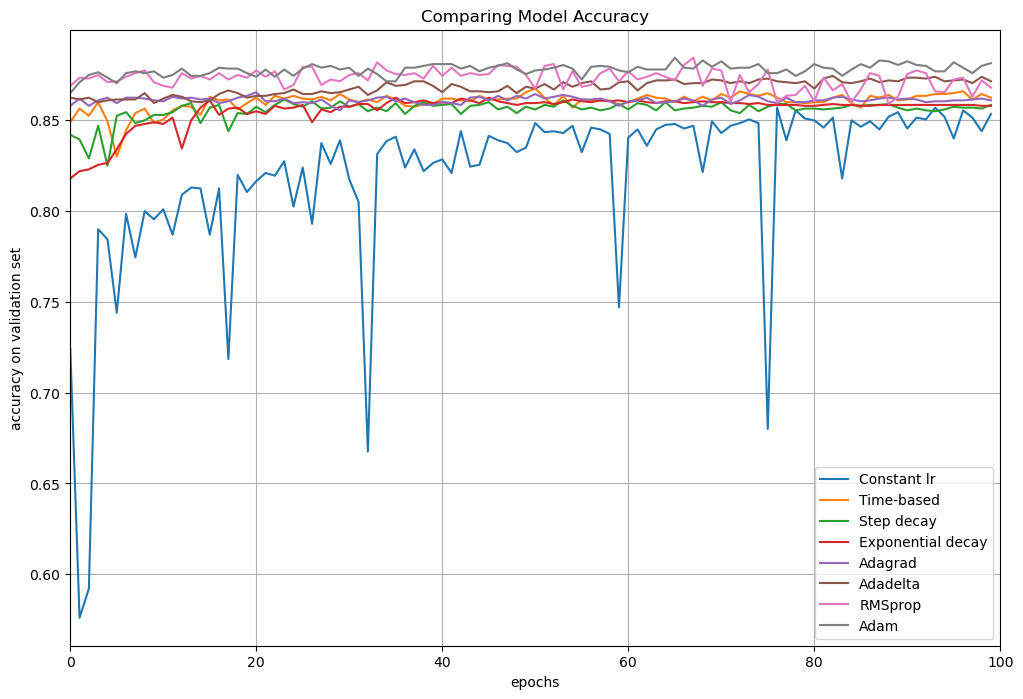

In [38]:
# Comparing Models accuracy

fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs),history_1.history['val_accuracy'],label='Constant lr')
plt.plot(range(epochs),history_2.history['val_accuracy'],label='Time-based')
plt.plot(range(epochs),history_3.history['val_accuracy'],label='Step decay')
plt.plot(range(epochs),history_4.history['val_accuracy'],label='Exponential decay')
plt.plot(range(epochs),history_5.history['val_accuracy'],label='Adagrad')
plt.plot(range(epochs),history_6.history['val_accuracy'],label='Adadelta')
plt.plot(range(epochs),history_7.history['val_accuracy'],label='RMSprop')
plt.plot(range(epochs),history_8.history['val_accuracy'],label='Adam')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('accuracy on validation set')
plt.grid(True)
plt.title("Comparing Model Accuracy")
plt.show()
fig.savefig('compare-accuracy.jpg')
plt.close(fig)

In [39]:
# more on tuning learning rate for deep learning
# https://arxiv.org/pdf/1206.5533v2.pdf

In [40]:
# Finall metrics for all the models 
summary_1 = pd.DataFrame(columns = ['Learning Rate', 'Loss', 'Loss Validation', 'Accuracy', 'Accuracy Validation'])
summary_1.loc[0] = ['Constant Learning Rate', history_1.history['loss'][99], history_1.history['val_loss'][99], history_1.history['accuracy'][99], history_1.history['val_accuracy'][99]]
summary_1.loc[1] = ['Time-based', history_2.history['loss'][99], history_2.history['val_loss'][99], history_2.history['accuracy'][99], history_2.history['val_accuracy'][99]]
summary_1.loc[2] = ['Step decay', history_3.history['loss'][99], history_3.history['val_loss'][99], history_3.history['accuracy'][99], history_3.history['val_accuracy'][99]]
summary_1.loc[3] = ['Exponential decay', history_4.history['loss'][99], history_4.history['val_loss'][99], history_4.history['accuracy'][99], history_4.history['val_accuracy'][99]]
summary_1.loc[4] = ['Adagrad', history_5.history['loss'][99], history_5.history['val_loss'][99], history_5.history['accuracy'][99], history_5.history['val_accuracy'][99]]
summary_1.loc[5] = ['Adadelta', history_6.history['loss'][99], history_6.history['val_loss'][99], history_6.history['accuracy'][99], history_6.history['val_accuracy'][99]]
summary_1.loc[6] = ['RMSprop', history_7.history['loss'][99], history_7.history['val_loss'][99], history_7.history['accuracy'][99], history_7.history['val_accuracy'][99]]
summary_1.loc[7] = ['Adam', history_8.history['loss'][99], history_8.history['val_loss'][99], history_8.history['accuracy'][99], history_8.history['val_accuracy'][99]]


In [41]:
summary_1


,Learning Rate,Loss,Loss Validation,Accuracy,Accuracy Validation
0,Constant Learning Rate,0.254112,0.370377,0.8816,0.8535
1,Time-based,0.192933,0.409877,0.9049,0.8625
2,Step decay,0.198452,0.391906,0.9061,0.8585
3,Exponential decay,0.231362,0.385165,0.8907,0.8580
4,Adagrad,0.214886,0.390966,0.8964,0.8610
5,Adadelta,0.199864,0.391124,0.9105,0.8715
6,RMSprop,0.282143,0.361158,0.8809,0.8680
7,Adam,0.183217,0.404484,0.9151,0.8815
